In [1]:
# %matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colormaps


from astropy.io import fits
from IPython.display import HTML
from hcipy import *

import sys

from iefc_utils import *

sys.path.append('/home/jasper/Documents/HCIPy_scripts/magaox-iefc-sim/')

# from magsimpyx import make_magaox_bump_mask  
PLOT_DIR = '/home/jasper/Documents/HCIPy_scripts/magaox-iefc-sim/FPM_shift/'

plt.style.use('spieposter')


In [2]:
# Set units

pupil_diameter = 6.5
wavelength = 750e-9 # m
effective_focal_length = 1

spatial_resolution = wavelength / pupil_diameter
sr = spatial_resolution


pupil_grid = make_pupil_grid(512, diameter=1.2*pupil_diameter)    # Pad the grid to offer a bit more room

focal_grid = make_focal_grid(q=5, num_airy=25, spatial_resolution = wavelength/pupil_diameter)

prop = FraunhoferPropagator(pupil_grid, focal_grid, focal_length=effective_focal_length)


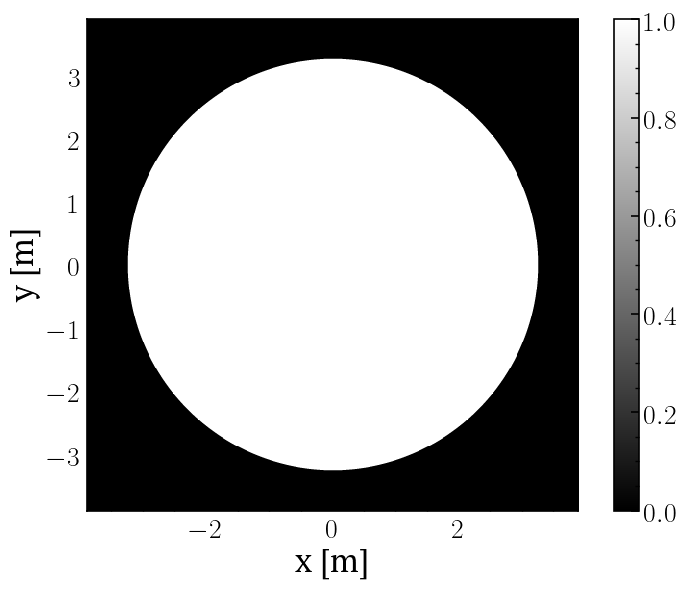

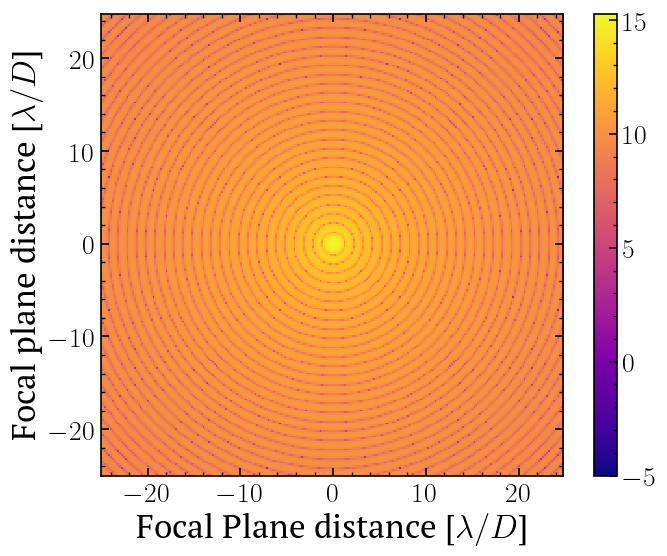

In [3]:
telescope_pupil_circ = evaluate_supersampled(make_circular_aperture(pupil_diameter), pupil_grid, 4)

# Plot telescope  pupil
imshow_field(telescope_pupil_circ, cmap='gray',)
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()
# plt.savefig('../mag_ap.svg', transparent=True)
plt.show()

wavefront = Wavefront(telescope_pupil_circ, wavelength)

wavefront.total_power = 1

focal_image = prop.forward(wavefront)

norm = focal_image.power.max()

# Plot PSF
imshow_field(np.log10(focal_image.intensity / norm), vmin=-5, grid_units=sr)
# save_field('magellan_pup.svg', np.log10(focal_image.intensity / norm))
plt.xlabel('Focal Plane distance [$\lambda / D$]')
plt.ylabel('Focal plane distance [$\lambda / D$]')
plt.colorbar()
plt.show()


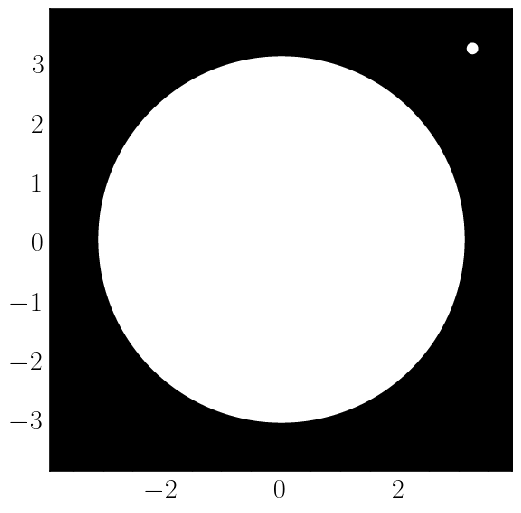

In [4]:
# Generate slightly undersized Lyot Stop                   
lyot_mask = evaluate_supersampled(make_circular_aperture(0.95*pupil_diameter), pupil_grid, 4)


# Add pinhole to Lyot mask 
# pinhole_pos = 0.8 * np.array([pupil_diameter/np.sqrt(2), pupil_diameter/np.sqrt(2)])
pinhole_pos = 0.7 * np.array([pupil_diameter/np.sqrt(2), pupil_diameter/np.sqrt(2)])

pinhole = evaluate_supersampled(make_circular_aperture(0.03*pupil_diameter, center=pinhole_pos), pupil_grid, 4)

scc_mask = lyot_mask + pinhole

# Plot SCC mask
imshow_field(scc_mask, cmap='gray')
plt.show()

scc_stop = Apodizer(scc_mask)

lyot_stop = Apodizer(lyot_mask)

pinhole_stop = Apodizer(pinhole)

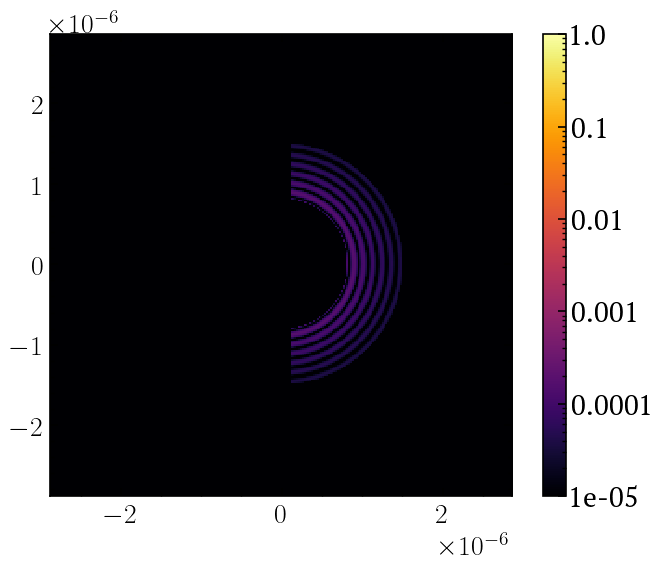

In [5]:


# Define control region

Dtel = 6.5
fourier_grid = make_pupil_grid(32, 32)        # Define grid


# fourier_mask = (fourier_grid.as_('polar').r < 10) * (fourier_grid.as_('polar').r > 2)   # Overlay modes from 2-10 lambda/d
# fourier_mask *= fourier_grid.x > 0

# focal_mask = (focal_grid.as_('polar').r < 9*sr) * (focal_grid.as_('polar').r > 3*sr)    # We prev. defined as 1 lambda/D
# focal_mask *= focal_grid.x > 1*sr

wavefront_circ = Wavefront(telescope_pupil_circ, wavelength)

wavefront_circ.total_power = 1

# focal_image = prop.forward(wavefront)

fourier_mask = (fourier_grid.as_('polar').r < 14) * (fourier_grid.as_('polar').r > 6)   #  Overlay modes from 6-14 lambda/d


# fourier_mask = (fourier_grid.as_('polar').r < 11) * (fourier_grid.as_('polar').r > 6)   
fourier_mask *= fourier_grid.x > 0

focal_mask = (focal_grid.as_('polar').r < 13*sr) * (focal_grid.as_('polar').r > 7*sr) 


# focal_mask = (focal_grid.as_('polar').r < 10*sr) * (focal_grid.as_('polar').r > 7*sr) 

focal_mask *= focal_grid.x > 1*sr

focal_image_circ = prop.forward(wavefront_circ)

dark_hole_pixels_circ = focal_image_circ.power*focal_mask



imshow_psf(dark_hole_pixels_circ/focal_image_circ.power.max() + 1e-16, vmax=1, vmin=1e-5)
plt.show()

fourier_basis = make_fourier_basis(pupil_grid, fourier_grid.scaled(2 * np.pi / Dtel))   

# Select Fourier modes that fall within DH
selected_modes = fourier_grid.subset(fourier_mask>0)     

fourier_basis_selected = make_fourier_basis(pupil_grid, selected_modes.scaled(2 * np.pi / Dtel))   # Basis w/ seelected Fourier modes from control region

fourier_dm = DeformableMirror(fourier_basis)
fourier_dm_selected = DeformableMirror(fourier_basis_selected)  # Create DM w/ only the selected modesw from control region

In [6]:
############ Initialize VVC
charge = 4                      # Generate a charge 4 scalar CG
coro_vortex = VortexCoronagraph(pupil_grid, charge=charge)

In [7]:
# Initialize vars for Jacobian

optical_system_scc = OpticalSystem([scc_stop, prop])
optical_system_lyot = OpticalSystem([lyot_stop, prop])
optical_system_pinhole = OpticalSystem([pinhole_stop, prop])


wf_vortex = Wavefront(telescope_pupil_circ, wavelength)

wf_vortex.total_power = 1 # Always define power, normalize it to 1

Measure response to mode 1 / 504
Measure response to mode 11 / 504
Measure response to mode 21 / 504
Measure response to mode 31 / 504
Measure response to mode 41 / 504
Measure response to mode 51 / 504
Measure response to mode 61 / 504
Measure response to mode 71 / 504
Measure response to mode 81 / 504
Measure response to mode 91 / 504
Measure response to mode 101 / 504
Measure response to mode 111 / 504
Measure response to mode 121 / 504
Measure response to mode 131 / 504
Measure response to mode 141 / 504
Measure response to mode 151 / 504
Measure response to mode 161 / 504
Measure response to mode 171 / 504
Measure response to mode 181 / 504
Measure response to mode 191 / 504
Measure response to mode 201 / 504
Measure response to mode 211 / 504
Measure response to mode 221 / 504
Measure response to mode 231 / 504
Measure response to mode 241 / 504
Measure response to mode 251 / 504
Measure response to mode 261 / 504
Measure response to mode 271 / 504
Measure response to mode 281 / 

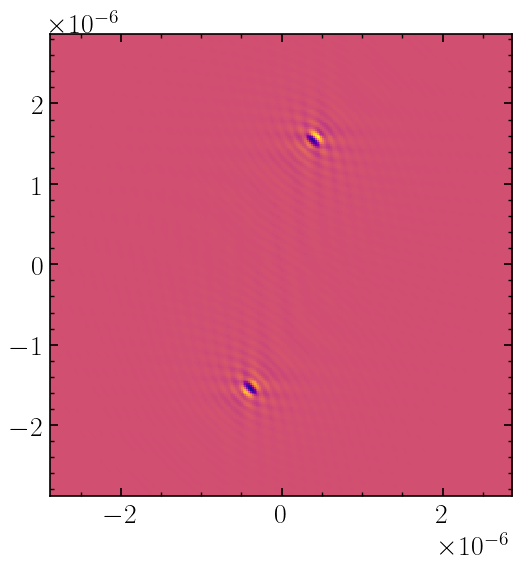

In [8]:
# # Jacobian (iEFC)

calibration_amp = 0.01 * wavelength

num_modes = fourier_dm_selected.num_actuators # Excite only the modes that fall within control region

fourier_dm_selected.flatten()

wf = Wavefront(telescope_pupil_circ, wavelength) # Reference WF

wf.total_power = 1 # Normalize to 1, so that photon flux is the same

response_matrices_selected = []

scc_sensor = make_scc_sensor(optical_system_scc, optical_system_lyot, optical_system_pinhole)

for ind in range(num_modes):
    if ind % 10 == 0:
        print('Measure response to mode {:d} / {:d}'.format(ind + 1, num_modes))
    
    calibration_images = []
    for cal_amp in [-calibration_amp, calibration_amp]:

        # Add the mode that we are calibrating
        fourier_dm_selected.actuators[ind] += cal_amp #  (Fourier DM) Ensure that we are only calibrating modes that fall on the pupil

        psf_scc, psf_lyot, psf_pinhole = scc_sensor(coro_vortex(fourier_dm_selected(wf)))  # Collect output WF image from SCC

        imshow_field((psf_scc - psf_lyot - psf_pinhole) / norm)

        wf_measurement = extract_measurement_from_scc_image(psf_scc, psf_lyot, psf_pinhole, dark_hole_pixels_circ>0) # Extract diff image measurements for DH region

        calibration_images.append(wf_measurement)

        # Remove the mode that we are calibrating
        fourier_dm_selected.actuators[ind] -= cal_amp

    slope = ((calibration_images[1] - calibration_images[0])/(2*calibration_amp)) # Construct slope vector

    response_matrices_selected.append(slope) # Append slope vector to response matrix

response_matrices_selected_arr = np.array(response_matrices_selected)


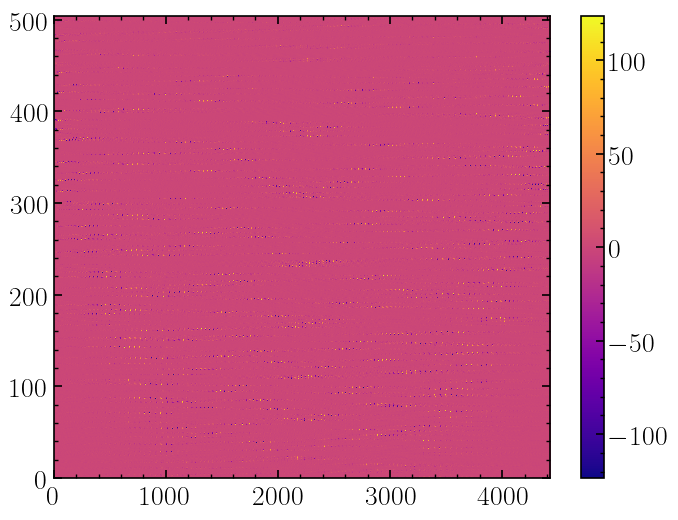

In [9]:
plt.imshow(response_matrices_selected_arr,aspect='auto')
plt.colorbar()

In [10]:
np.save('./jacobian_scc_circ_ap_7_13.npy', response_matrices_selected_arr)


In [14]:
resp_mat_sel = response_matrices_selected_arr

# Compute reconstruction matrix
# rcond = 2e-3
rcond = 1e-2

reconstruction_matrices_selected = inverse_tikhonov(resp_mat_sel.T, rcond=rcond, svd=None) # Feed in response matrix for DH modes

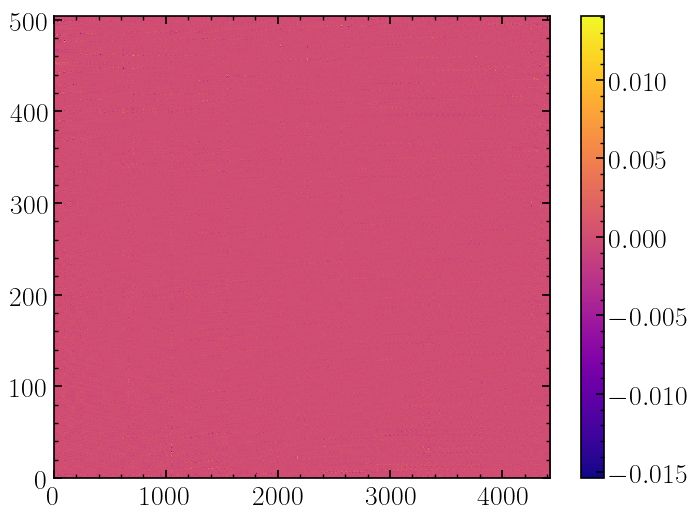

In [15]:
plt.imshow(reconstruction_matrices_selected, aspect='auto')
plt.colorbar()

In [16]:
np.save(f'./rec_mat_scc_circ_ap_7_13_reg_{rcond}.npy', reconstruction_matrices_selected)
